In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# men's 1500m final
df_1500 = pd.read_excel('olympic.xlsx', sheet_name = 'm1500 final times')
df_1500.head()

,rank,heat,lane,name,country,rt,time,split1,split2,split3,...,split21,split22,split23,split24,split25,split26,split27,split28,split29,split30
0,1,6,4,PALTRINIERI Gregorio,ITA,0.80,1900-01-02 00:14:44.510,27.68,29.49,29.69,...,29.35,29.49,29.45,29.58,29.29,29.79,29.53,30.17,29.62,29.47
1,10,6,1,MILNE Stephen,GBR,0.77,1900-01-02 00:14:57.230,27.59,30.08,29.48,...,30.18,30.51,30.14,30.60,30.10,30.49,29.84,30.27,28.63,27.18
2,11,6,2,AKRAM Ahmed,EGY,0.74,1900-01-02 00:14:58.370,27.42,29.80,29.59,...,30.04,30.76,30.09,30.76,30.29,30.69,30.17,30.92,30.32,29.80
3,12,4,3,MICKA Jan,CZE,0.72,1900-01-02 00:14:58.690,27.76,29.79,29.51,...,30.17,30.50,30.30,30.38,30.41,30.51,30.35,30.89,30.10,28.56
4,13,2,4,DRUZHININ Ilia,RUS,0.77,1900-01-02 00:14:59.560,27.36,29.73,29.70,...,30.20,30.05,30.06,30.03,30.11,30.24,30.18,30.57,29.09,28.37


In [3]:
df_1500['lane'] = 'lane' + df_1500['lane'].astype(str)

In [4]:
# fixed effects for lanes
lane_dummies = pd.get_dummies(df_1500['lane'])

In [5]:
# average time of outgoing slipts (odd splits except for first & last slipts 
# first & last splits' time could be different due to strategy
df_1500['outgoing'] = (df_1500[['split3','split5','split7','split9','split11', 'split13','split15', 'split17', 
                     'split19', 'split21', 'split23', 'split25', 'split27','split29']]).mean(axis = 1)

In [6]:
# average time of returning slipts (even splits except for first & last slipts)
df_1500['returning'] = (df_1500[['split2','split4','split6','split8','split10', 'split12','split14', 'split16', 
                     'split18', 'split20', 'split22', 'split24', 'split26','split28']]).mean(axis = 1)

In [7]:
df1500_with_dummies = df_1500.join(lane_dummies)
df1500_with_dummies.head()

,rank,heat,lane,name,country,rt,time,split1,split2,split3,...,outgoing,returning,lane1,lane2,lane3,lane4,lane5,lane6,lane7,lane8
0,1,6,lane4,PALTRINIERI Gregorio,ITA,0.80,1900-01-02 00:14:44.510,27.68,29.49,29.69,...,29.431429,29.665714,0,0,0,1,0,0,0,0
1,10,6,lane1,MILNE Stephen,GBR,0.77,1900-01-02 00:14:57.230,27.59,30.08,29.48,...,29.840714,30.335000,1,0,0,0,0,0,0,0
2,11,6,lane2,AKRAM Ahmed,EGY,0.74,1900-01-02 00:14:58.370,27.42,29.80,29.59,...,29.772857,30.309286,0,1,0,0,0,0,0,0
3,12,4,lane3,MICKA Jan,CZE,0.72,1900-01-02 00:14:58.690,27.76,29.79,29.51,...,30.034286,30.135000,0,0,1,0,0,0,0,0
4,13,2,lane4,DRUZHININ Ilia,RUS,0.77,1900-01-02 00:14:59.560,27.36,29.73,29.70,...,30.057857,30.215714,0,0,0,1,0,0,0,0


In [8]:
model = smf.ols(formula = "outgoing ~ rank + returning + lane1 + lane2 + lane3 + lane4 + lane5 + lane6 + lane7", 
                data = df1500_with_dummies).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               outgoing   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     99.58
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           2.99e-22
Time:                        22:09:55   Log-Likelihood:                 30.659
No. Observations:                  45   AIC:                            -41.32
Df Residuals:                      35   BIC:                            -23.25
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9981      4.567      2.627      0.0

In [9]:
# women's 800m final
df_800 = pd.read_excel('olympic.xlsx', sheet_name = 'w800 final times')
df_800.head()

,rank,heat,lane,name,country,rt,time,split1,split2,split3,...,split7,split8,split9,split10,split11,split12,split13,split14,split15,split16
0,1,4,4,LEDECKY Katie,USA,0.70,1900-01-02 00:08:12.860,28.82,30.40,30.75,...,31.43,31.08,30.99,30.72,31.33,30.93,31.10,31.38,30.99,30.35
1,10,3,6,MACLEAN Brittany,CAN,0.73,1900-01-02 00:08:26.430,29.37,31.21,31.58,...,32.05,31.84,31.97,31.95,32.08,32.20,32.21,32.15,32.04,30.76
2,11,4,8,HOU Yawen,CHN,0.81,1900-01-02 00:08:30.590,30.26,31.37,31.42,...,32.23,31.91,32.33,32.11,32.65,32.24,32.62,32.51,32.50,30.94
3,12,2,2,PINTO Andreina,VEN,0.75,1900-01-02 00:08:30.920,30.12,32.20,32.16,...,32.07,32.23,31.76,32.17,31.93,31.95,31.79,32.26,31.83,31.54
4,13,4,1,ODER Tjasa,SLO,0.74,1900-01-02 00:08:33.140,29.73,32.14,31.65,...,31.86,32.60,32.08,32.68,32.36,32.65,32.16,32.89,32.25,31.70


In [10]:
df_800['lane'] = 'lane' + df_800['lane'].astype(str)

In [11]:
lane_dummies2 = pd.get_dummies(df_800['lane'])

In [12]:
# average time of outgoing slipts (odd splits except for first & last slipts 
# first & last splits' time could be different due to strategy
df_800['outgoing'] = (df_800[['split3','split5','split7','split9','split11', 'split13','split15']]).mean(axis = 1)

In [13]:
# average time of returning slipts (even splits except for first & last slipts)
df_800['returning'] = (df_800[['split2','split4','split6','split8','split10', 'split12','split14']]).mean(axis = 1)

In [14]:
df800_with_dummies = df_800.join(lane_dummies2)
df800_with_dummies.head()

,rank,heat,lane,name,country,rt,time,split1,split2,split3,...,outgoing,returning,lane1,lane2,lane3,lane4,lane5,lane6,lane7,lane8
0,1,4,lane4,LEDECKY Katie,USA,0.70,1900-01-02 00:08:12.860,28.82,30.40,30.75,...,31.114286,30.841429,0,0,0,1,0,0,0,0
1,10,3,lane6,MACLEAN Brittany,CAN,0.73,1900-01-02 00:08:26.430,29.37,31.21,31.58,...,31.961429,31.795714,0,0,0,0,0,1,0,0
2,11,4,lane8,HOU Yawen,CHN,0.81,1900-01-02 00:08:30.590,30.26,31.37,31.42,...,32.232857,31.965714,0,0,0,0,0,0,0,1
3,12,2,lane2,PINTO Andreina,VEN,0.75,1900-01-02 00:08:30.920,30.12,32.20,32.16,...,31.942857,32.237143,0,1,0,0,0,0,0,0
4,13,4,lane1,ODER Tjasa,SLO,0.74,1900-01-02 00:08:33.140,29.73,32.14,31.65,...,32.027143,32.502857,1,0,0,0,0,0,0,0


In [15]:
model = smf.ols(formula = "outgoing ~ rank + returning + lane1 + lane2 + lane3 + lane4 + lane5 + lane6 + lane7", 
                data = df800_with_dummies).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               outgoing   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           9.50e-14
Time:                        22:09:55   Log-Likelihood:                 25.688
No. Observations:                  27   AIC:                            -31.38
Df Residuals:                      17   BIC:                            -18.42
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7195      3.075      3.161      0.0

# In men's 1500m and women's 800m, lanes 1-3 showed statistically significant disadvantage in even splits

# The effects can be offset by odd splits in long distance competitions, but in 50m events where rankings are determined by a fraction of a milisecond, this bias can potentially affect final results

# in 50m events, if lanes 1-3 are really negatively affected by a current, we should see:
# 1) atheletes in lanes 1-3 would get worse results in semifinals & finals than their pre-Olympic personal best
# 2) atheletes who changed lanes from 1-3 to 6-8 would see an improvement

In [16]:
df_50 = pd.read_excel('olympic.xlsx', sheet_name = '50fr prelims and finals').fillna(0)
df_50.head()

,gender,rank,heat,lane,name,lastname,country,rt,time,qualtime,sfheat,sflane,sftime,fheat,flane,ftime
0,f,1,12,6,BLUME Pernille,BLUME,DEN,0.63,24.23,24.47,2.0,4.0,24.28,1.0,4.0,24.07
1,f,2,11,5,HALSALL Francesca,HALSALL,GBR,0.70,24.26,24.21,1.0,4.0,24.41,1.0,6.0,24.13
2,f,3,10,6,HERASIMENIA Aliaksandra,HERASIMENIA,BLR,0.70,24.42,24.52,2.0,5.0,24.53,1.0,8.0,24.11
3,f,4,12,4,CAMPBELL Bronte,CAMPBELL,AUS,0.67,24.45,24.12,1.0,5.0,24.43,1.0,2.0,24.42
4,f,5,11,6,OTTESEN Jeanette,OTTESEN,DEN,0.64,24.48,24.47,1.0,3.0,24.62,0.0,0.0,0.00


In [17]:
df_50_sf = df_50[df_50['sflane']>0]

In [18]:
df_50_sf['sflane'] = df_50_sf['sflane'].astype(int)
df_50_sf['sflane'] = 'lane' + df_50_sf['sflane'].astype(str)
lane_dummies3 = pd.get_dummies(df_50_sf['sflane'])

In [19]:
df50_sf_dummies = df_50.join(lane_dummies3)
df50_sf = df50_sf_dummies[df50_sf_dummies['sftime'] >0 ]
df50_sf.head()

,gender,rank,heat,lane,name,lastname,country,rt,time,qualtime,...,flane,ftime,lane1,lane2,lane3,lane4,lane5,lane6,lane7,lane8
0,f,1,12,6,BLUME Pernille,BLUME,DEN,0.63,24.23,24.47,...,4.0,24.07,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,f,2,11,5,HALSALL Francesca,HALSALL,GBR,0.70,24.26,24.21,...,6.0,24.13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,f,3,10,6,HERASIMENIA Aliaksandra,HERASIMENIA,BLR,0.70,24.42,24.52,...,8.0,24.11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,f,4,12,4,CAMPBELL Bronte,CAMPBELL,AUS,0.67,24.45,24.12,...,2.0,24.42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,f,5,11,6,OTTESEN Jeanette,OTTESEN,DEN,0.64,24.48,24.47,...,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
model = smf.ols(formula = "sftime ~ qualtime + lane1 + lane2 + lane3 + lane4 + lane5 + lane6 + lane7", 
                data = df50_sf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sftime   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     253.6
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.47e-20
Time:                        22:09:55   Log-Likelihood:                 15.131
No. Observations:                  32   AIC:                            -12.26
Df Residuals:                      23   BIC:                            0.9295
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0890      0.552     -1.975      0.0

In [21]:
df_50_f = df_50.loc[df_50['flane']>0]
df_50_f['sf_speed'] = 50/df_50_f['sftime']
df_50_f['f_speed'] = 50/df_50_f['ftime']
df_50_f

,gender,rank,heat,lane,name,lastname,country,rt,time,qualtime,sfheat,sflane,sftime,fheat,flane,ftime,sf_speed,f_speed
0,f,1,12,6,BLUME Pernille,BLUME,DEN,0.63,24.23,24.47,2.0,4.0,24.28,1.0,4.0,24.07,2.059308,2.077275
1,f,2,11,5,HALSALL Francesca,HALSALL,GBR,0.70,24.26,24.21,1.0,4.0,24.41,1.0,6.0,24.13,2.048341,2.072109
2,f,3,10,6,HERASIMENIA Aliaksandra,HERASIMENIA,BLR,0.70,24.42,24.52,2.0,5.0,24.53,1.0,8.0,24.11,2.038320,2.073828
3,f,4,12,4,CAMPBELL Bronte,CAMPBELL,AUS,0.67,24.45,24.12,1.0,5.0,24.43,1.0,2.0,24.42,2.046664,2.047502
6,f,7,11,4,CAMPBELL Cate,CAMPBELL,AUS,0.82,24.52,23.84,2.0,6.0,24.32,1.0,5.0,24.15,2.055921,2.070393
7,f,8,10,4,KROMOWIDJOJO Ranomi,KROMOWIDJOJO,NED,0.67,24.57,24.07,2.0,2.0,24.39,1.0,3.0,24.19,2.050021,2.066970
10,f,11,11,3,MANUEL Simone,MANUEL,USA,0.69,24.71,24.33,2.0,7.0,24.44,1.0,7.0,24.09,2.045827,2.075550
15,f,16,11,2,MEDEIROS Etiene,MEDEIROS,BRA,0.61,24.82,24.55,1.0,8.0,24.45,1.0,1.0,24.69,2.044990,2.025111
88,m,1,11,3,GOVOROV Andrii,GOVOROV,UKR,0.60,21.49,21.61,2.0,4.0,21.46,1.0,5.0,21.74,2.329916,2.299908
89,m,2,10,4,ADRIAN Nathan,ADRIAN,USA,0.67,21.61,21.37,1.0,4.0,21.47,1.0,6.0,21.49,2.328831,2.326664


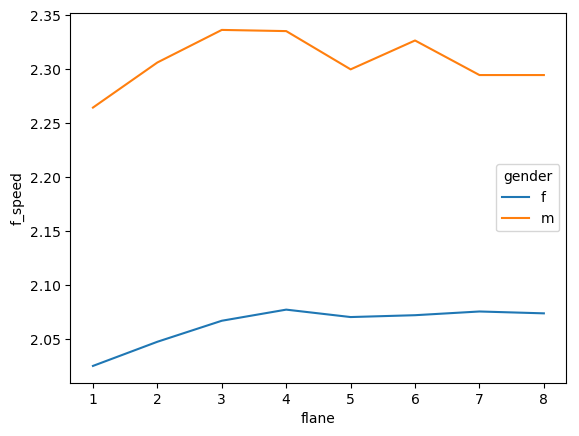

In [22]:
ax = sns.lineplot(data = df_50_f, x='flane', y='f_speed', hue = 'gender', sizes = (4,8))
plt.show()

# athletes in lanes 1-3 in 50m final slower than their peers